In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
kospi_200_items = pd.read_excel('./현대차.xlsx')

In [5]:
data = kospi_200_items.iloc[1:]
data.index = data['Symbol Name']

In [6]:
data['현대차'] = data['현대차'].astype('float64')

In [7]:
data = pd.DataFrame(data.iloc[:,1])

In [8]:
data

,현대차
Symbol Name,
2010-01-04,119000.0
2010-01-05,110000.0
2010-01-06,111000.0
2010-01-07,106000.0
2010-01-08,106000.0
2010-01-11,101500.0
2010-01-12,103000.0
2010-01-13,102000.0
2010-01-14,103500.0


In [172]:
# number : n일이동평균 / back: 몇일 전 이동평균
def making_SMA(data,number,back=0):
    ls = pd.DataFrame(np.zeros(number+back-1))
    
    for place in list(range(len(data)))[number+back-1:]:
        sumation = data['현대차'][list(range(place-number-back+1,place-back+1))].mean()
        sumation = pd.Series(sumation)
        ls = ls.append(sumation,ignore_index=True)
    ls.index = data.index
    
    ls.columns = ['현대차']
    ls = data > ls
    
    return ls.astype('float64')[10:-10]

In [160]:
# number : n일이동평균 / back: 몇일 전 이동평균
def making_WMA(data,number,back=0):
    ls = pd.DataFrame(np.zeros(number+back-1))
    
    for place in list(range(len(data)))[number+back-1:]:
        sumation = data['현대차'][list(range(place-number-back+1,place-back+1))]
        sumation2 = (np.array(sumation) * (np.array(range(number))+1)).sum() / (np.array(range(number))+1).sum()
        
        sumation2 = pd.Series(sumation2)
        ls = ls.append(sumation2,ignore_index=True)
    ls.index = data.index
    
    ls.columns = ['현대차']
    ls = data > ls
    
    return ls.astype('float64')[10:-10]

In [170]:
# number : forward+1 수익률 / back: 몇일 전 이동평균
def making_cate_revenue(data,forward=0):
    
    the_day_price = data['현대차'][0:len(data)-1-forward]
    next_day_price = data['현대차'][forward+1:]
    
    next_day_price.index = the_day_price.index
    
    ls = the_day_price < next_day_price
    ls = ls.append(pd.DataFrame([0]))
    return ls.astype('float64')[10:-10]

In [179]:
making_cate_revenue(data)[10:-10]

,0
2010-02-01,0.0
2010-02-02,0.0
2010-02-03,1.0
2010-02-04,0.0
2010-02-05,1.0
2010-02-08,1.0
2010-02-09,0.0
2010-02-10,1.0
2010-02-11,0.0
2010-02-12,1.0


In [180]:
making_SMA(data,5)

,현대차
Symbol Name,
2010-01-18,1.0
2010-01-19,0.0
2010-01-20,0.0
2010-01-21,1.0
2010-01-22,1.0
2010-01-25,1.0
2010-01-26,1.0
2010-01-27,0.0
2010-01-28,1.0


In [182]:
c = making_cate_revenue(data)
for i in np.array(range(10))+1:
    a = making_SMA(data,i)
    b = making_WMA(data,i)

    ssets = pd.concat([a,c],axis=1).iloc[10:-10]
    wsets = pd.concat([b,c],axis=1).iloc[10:-10]
    ssets.columns = ['sma','price']
    wsets.columns = ['wma','price']
    
    print(confusion_matrix(c,a))
    print(confusion_matrix(c,b))

[[916   0]
 [797   0]]
[[916   0]
 [797   0]]
[[501 415]
 [415 382]]
[[501 415]
 [415 382]]
[[474 442]
 [400 397]]
[[472 444]
 [397 400]]
[[467 449]
 [415 382]]
[[474 442]
 [399 398]]
[[453 463]
 [414 383]]
[[458 458]
 [406 391]]
[[447 469]
 [422 375]]
[[450 466]
 [405 392]]
[[441 475]
 [421 376]]
[[449 467]
 [406 391]]
[[442 474]
 [423 374]]
[[449 467]
 [409 388]]
[[439 477]
 [417 380]]
[[446 470]
 [415 382]]
[[435 481]
 [409 388]]
[[439 477]
 [418 379]]


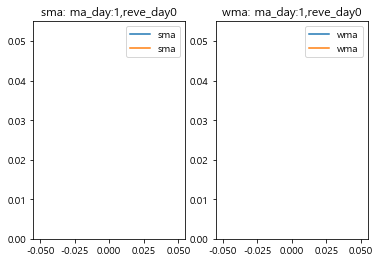

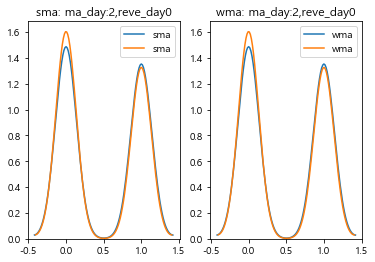

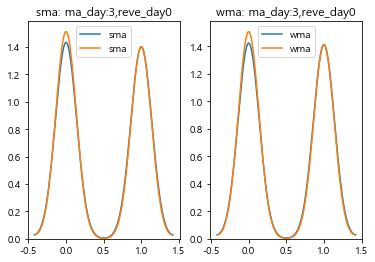

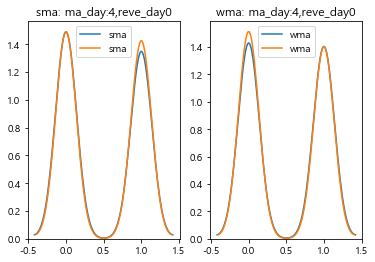

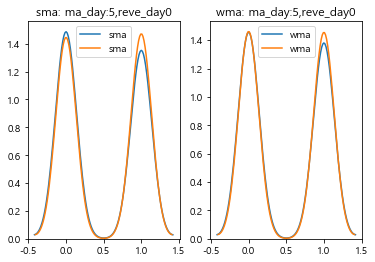

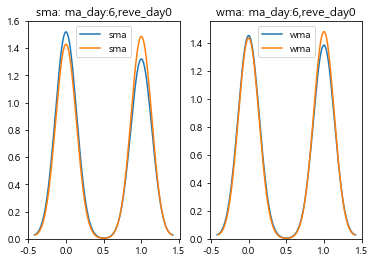

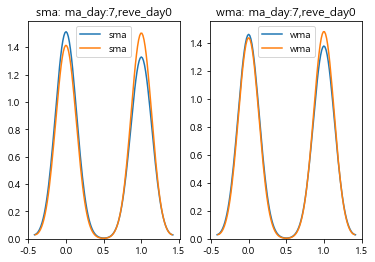

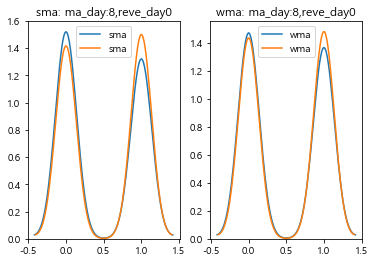

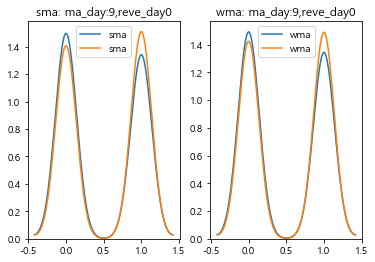

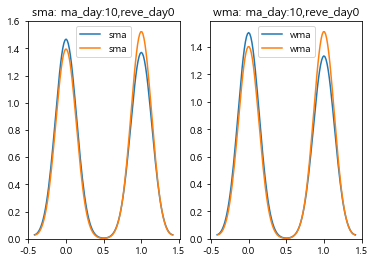

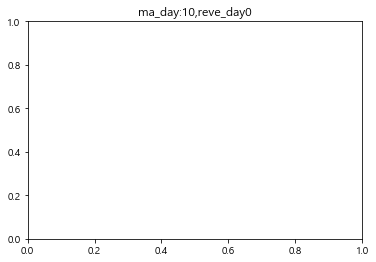

In [175]:
c = making_cate_revenue(data)
for i in np.array(range(10))+1:
    a = making_SMA(data,i)
    b = making_WMA(data,i)

    ssets = pd.concat([a,c],axis=1).iloc[10:-10]
    wsets = pd.concat([b,c],axis=1).iloc[10:-10]
    ssets.columns = ['sma','price']
    wsets.columns = ['wma','price']
    
    plt.subplot(121)
    sns.kdeplot(data=ssets[ssets['price'] == 1.0]['sma'])
    sns.kdeplot(data=ssets[ssets['price'] == 0.0]['sma'])
    plt.title('sma: ma_day:{},reve_day{}'.format(i,k))
    
    plt.subplot(122)
    sns.kdeplot(data=wsets[wsets['price'] == 1.0]['wma'])
    sns.kdeplot(data=wsets[wsets['price'] == 0.0]['wma'])
    plt.title('wma: ma_day:{},reve_day{}'.format(i,k))
    
    plt.show()
    plt.title('ma_day:{},reve_day{}'.format(i,k))


In [181]:
making_cate_revenue(data)

,0
2010-01-18,0.0
2010-01-19,0.0
2010-01-20,1.0
2010-01-21,1.0
2010-01-22,1.0
2010-01-25,0.0
2010-01-26,1.0
2010-01-27,1.0
2010-01-28,0.0
2010-01-29,1.0
